In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('/content/master_file.csv')

In [3]:
df = data.dropna(axis=1, how='all') #dropping all null columns
df = df.dropna(subset=['Date'])  #dropping all records which have null value from the Date column

In [4]:
correlation_matrix = df.corr()

<ipython-input-4-68bbfff3c4eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


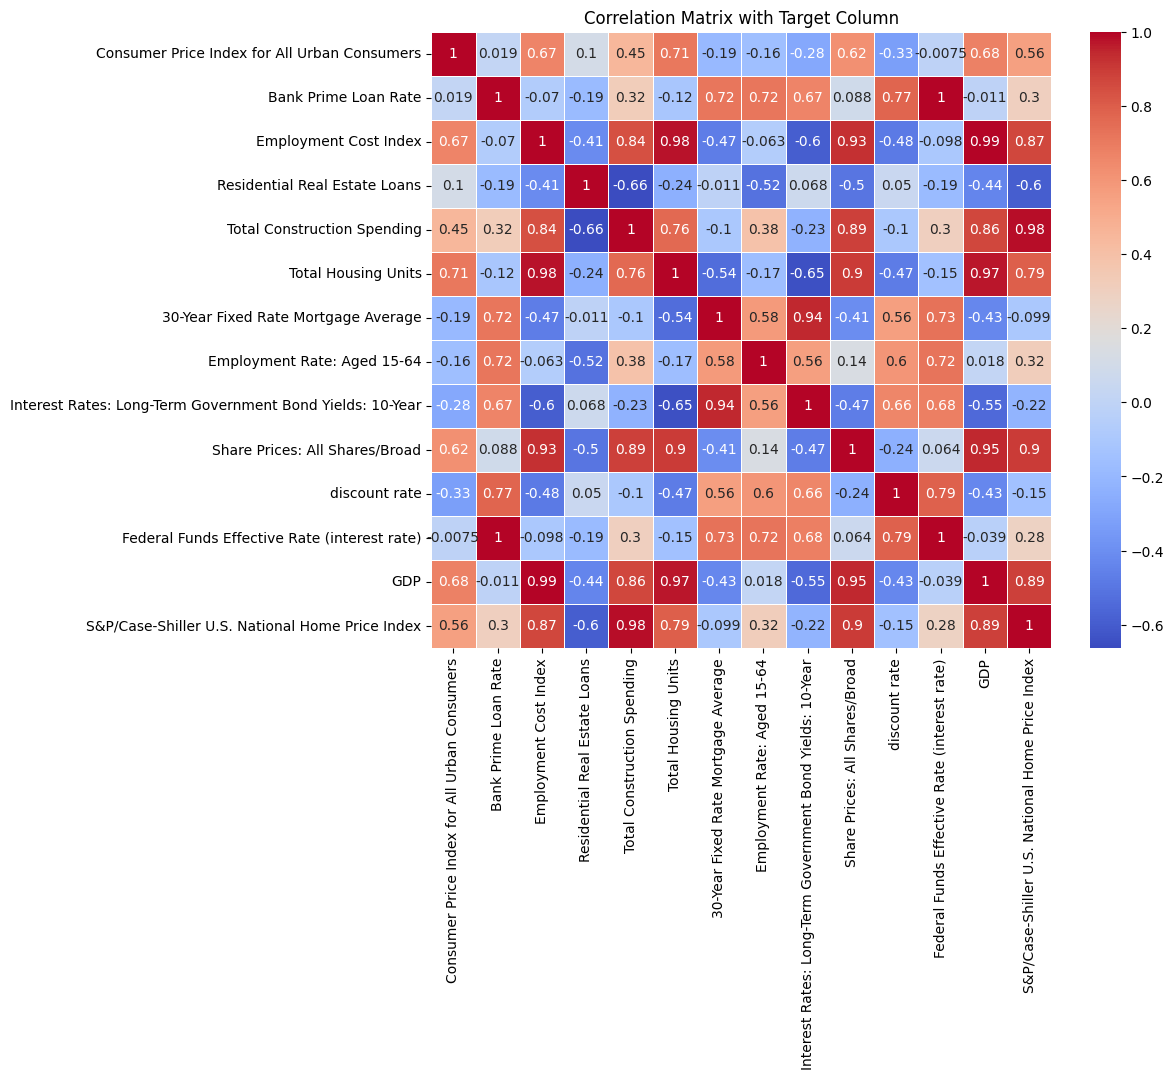

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix with Target Column")
plt.show()

In [6]:
#dropping columns which have corellation near 0 or near 1/-1
#30 year fixed mortage average
#discount rate
df=df.drop("30-Year Fixed Rate Mortgage Average",axis=1)
df=df.drop("discount rate",axis=1)
df=df.drop("Date",axis=1)

In [7]:
predictors = df.iloc[:, :-1]
target = df.iloc[:, -1]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=42)

In [9]:
cols=X_train.columns
print(cols)

Index(['Consumer Price Index for All Urban Consumers', 'Bank Prime Loan Rate',
       'Employment Cost Index', 'Residential Real Estate Loans',
       'Total Construction Spending', 'Total Housing Units',
       'Employment Rate: Aged 15-64',
       'Interest Rates: Long-Term Government Bond Yields: 10-Year',
       'Share Prices: All Shares/Broad',
       'Federal Funds Effective Rate (interest rate)', 'GDP'],
      dtype='object')


In [10]:

# Create a MinMaxScaler instance
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
print(X_train)

[[0.59333752 0.         0.32813677 ... 0.24259446 0.00568182 0.2996997 ]
 [0.86550802 0.42857143 0.90956752 ... 0.86409164 0.43181818 0.91171171]
 [0.4215768  0.         0.27540926 ... 0.18051768 0.01515152 0.22762763]
 ...
 [0.41960349 0.         0.28004551 ... 0.2331516  0.02840909 0.24024024]
 [0.35516642 0.19047619 0.53464631 ... 0.57857163 0.20833333 0.51771772]
 [0.53093223 0.         0.30086934 ... 0.29504948 0.02083333 0.26006006]]


In [12]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

In [13]:
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

In [14]:
print(best_rf)

RandomForestRegressor(max_features='sqrt', n_estimators=300, random_state=42)


In [15]:
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R^2) Score: {r2:.2f}")

Mean Squared Error (MSE): 1.54
Root Mean Squared Error (RMSE): 1.24
Mean Absolute Error (MAE): 0.87
R-squared (R^2) Score: 1.00


In [17]:
print(len(feature_importances))

NameError: ignored

Feature 1: Consumer Price Index for All Urban Consumers - Importance: 0.0400
Feature 2: Bank Prime Loan Rate - Importance: 0.0094
Feature 3: Employment Cost Index - Importance: 0.2194
Feature 4: Residential Real Estate Loans - Importance: 0.0352
Feature 5: Total Construction Spending - Importance: 0.2323
Feature 6: Total Housing Units - Importance: 0.1788
Feature 7: Employment Rate: Aged 15-64 - Importance: 0.0100
Feature 8: Interest Rates: Long-Term Government Bond Yields: 10-Year - Importance: 0.0074
Feature 9: Share Prices: All Shares/Broad - Importance: 0.1223
Feature 10: Federal Funds Effective Rate (interest rate) - Importance: 0.0099
Feature 11: GDP - Importance: 0.1353


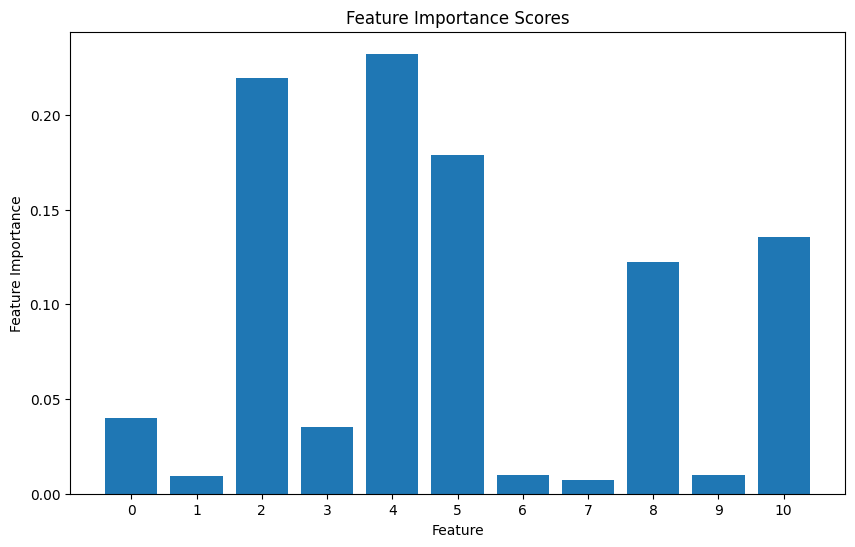

In [18]:
feature_importances = best_rf.feature_importances_
feature_names = cols  # Replace with the actual feature names
#
# Print feature importance scores along with feature names
for i, (name, importance) in enumerate(zip(feature_names, feature_importances)):
    print(f"Feature {i + 1}: {name} - Importance: {importance:.4f}")

# Visualize feature importance scores
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances)
plt.xticks(range(len(feature_importances)))
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Feature Importance Scores")
plt.show()

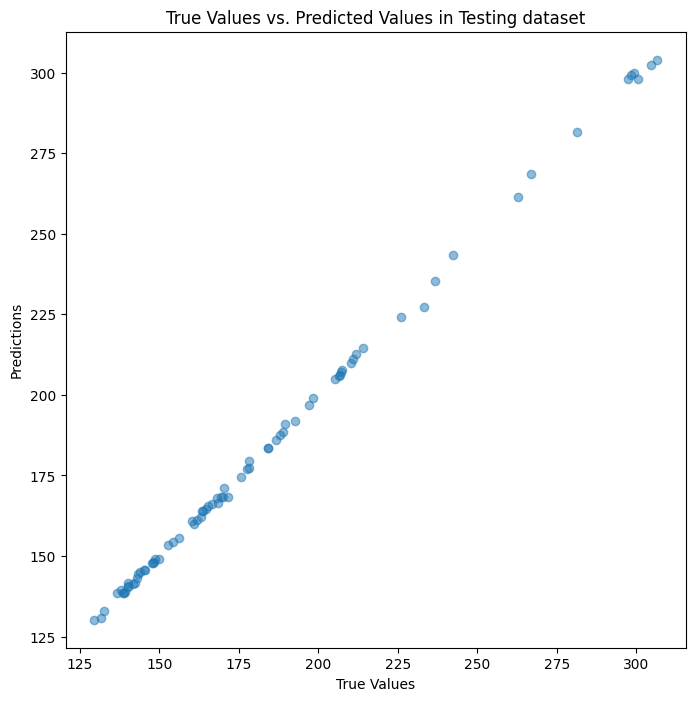

In [20]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predicted Values in Testing dataset')
plt.show()